In [2]:
from stingray import Crossspectrum, Lightcurve, sampledata
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

%matplotlib inline

Define variability signal.

In [3]:
lc = sampledata.sample_data()
s = lc.counts

Define a delta impulse response with a delay of 10.

In [4]:
h_zeros = np.zeros(int(10.0/lc.dt))
h = np.append(h_zeros, 1)

Find output signal by taking convolution of variability signal and impulse response.

In [5]:
output = signal.fftconvolve(s, h)
# To make two counts of equal size, remove last '10/lc.dt' entries
output = output[:-80]

Visualize input and output signals.

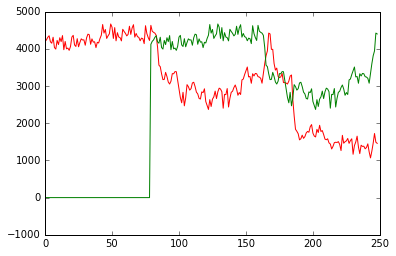

In [6]:
plt.figure()
plt.plot(s[1:250],'r',output[1:250],'g')
plt.show()

Make lightcurves using `Lightcurve` class.

In [7]:
time = lc.time
lc1 = Lightcurve(time, s)
lc2 = Lightcurve(time, output)

Compute crossspectrum.

In [8]:
cross = Crossspectrum(lc1, lc2)

Calculate time lag.

In [9]:
lag = np.angle(cross.cs)/ (2 * np.pi * cross.freq)

Plot lag.

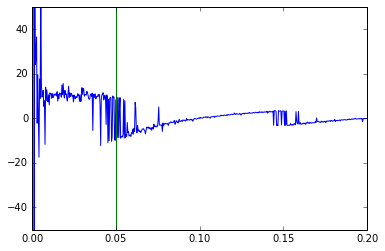

In [11]:
plt.figure()

# Plot lag-frequency spectrum.
plt.plot(cross.freq, lag)

# Define the x-position of vertical line
cutoff = 1.0/(2*10.0)
plt.plot((cutoff,cutoff),(-50,50),'g')

# Define axis
plt.axis([0,0.2,-50,50])
plt.show()

According to Uttley et al, the lag-frequency spectrum shows a constant delay until the frequency (1/2*time_delay) which is represented by the green vertical line in the above figure. After this point, the phase warps and the lag becomes negative. This is given in page 43 of review.